In [1]:
import torch, imutils
from torchvision import models, transforms
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import torch.nn.functional as F
import torch.nn as nn

In [ ]:
model = models.alexnet(pretrained=True)

In [ ]:
model

In [ ]:
model.features

In [ ]:
model.features._modules

In [ ]:
for ind, module in model.features._modules.items():
    print(ind)
    print(module)
    break

In [ ]:
a = torch.ones(5)

In [ ]:
a

In [ ]:
a.requires_grad

In [ ]:
a.requires_grad = True

In [ ]:
b = 2*a

In [ ]:
b.is_leaf

In [ ]:
a.is_leaf

In [ ]:
b.grad_fn

In [ ]:
c = b.mean()

In [ ]:
c.grad_fn

In [ ]:
b.grad_fn

In [ ]:
c.backward()

In [ ]:
c.grad

In [ ]:
b.grad

In [ ]:
a.grad

In [ ]:
a = torch.ones(5)
a.requires_grad = True
b = 2 * a
b.retain_grad()
b.register_hook(lambda x: print(x))
b.mean().backward()

In [ ]:
print(a.grad, b.grad)

In [ ]:
models.__dict__

In [93]:
alexnet = models.alexnet(pretrained=True)
inceptionv3 = models.inception_v3(pretrained=True)
googlenet = models.googlenet(pretrained=True)
vgg16 = models.vgg16_bn(pretrained=True)
vgg19 = models.vgg19_bn(pretrained=True)
resnet18 = models.resnet18(pretrained=True)
resnet101 = models.resnet101(pretrained=True)

In [ ]:
alexnet.named_modules

In [ ]:
inceptionv3.named_modules

In [ ]:
googlenet.named_modules

In [96]:
vgg16._modules

OrderedDict([('features',
              Sequential(
                (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
                (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                (2): ReLU(inplace=True)
                (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
                (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                (5): ReLU(inplace=True)
                (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
                (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
                (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                (9): ReLU(inplace=True)
                (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
                (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, 

In [ ]:
vgg19.named_modules

In [ ]:
for name, module in resnet18.named_modules():
    print(module)

In [ ]:
resnet101.named_modules

In [ ]:
im = Image.fromarray(img)

In [ ]:
plt.figure(figsize=(16,8))
plt.imshow(img)

In [ ]:
image = transforms.Compose([transforms.RandomCrop(227)])(im)
image = transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
            
        ]
    )(image)

In [ ]:
images = list()
images.append()

In [2]:
def preprocess(image_path):
    img = cv2.imread(image_path)
    raw_image = cv2.resize(img, (227, 227))
    image = transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
            
        ]
    )(raw_image[..., ::-1].copy())
    
    return image, raw_image

def load_image(image_path):
    images = []
    raw_images = []
    print("Images:")
    for i, image_path in enumerate(image_path):
        print("\t#{}: {}".format(i, image_path))
        image, raw_image = preprocess(image_path)
        images.append(image)  # create list of all the processed images of [3,224,224] dimension
        raw_images.append(raw_image)  # create a list of all the original images as provided by the user of varying size
    return images, raw_images

In [3]:
images, raw_images = load_image(["half dome.jpeg"])
images = torch.stack(images)

Images:
	#0: half dome.jpeg


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


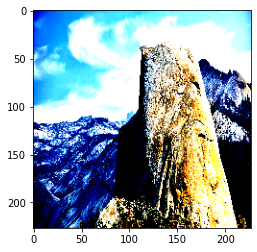

In [4]:
plt.imshow(images[0].permute(1,2,0).numpy())

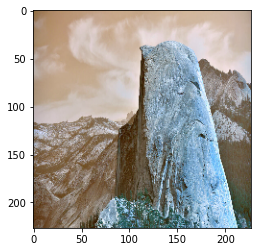

In [5]:
plt.imshow(raw_images[0])

In [6]:
raw_images[0].shape

(227, 227, 3)

In [7]:
arch = "googlenet"
model = models.__dict__[arch](pretrained=True)

In [8]:
images

tensor([[[[-1.0390, -0.8678, -0.9020,  ...,  0.3481,  0.3138,  0.2967],
          [-0.9705, -0.8849, -0.9363,  ...,  0.3481,  0.3138,  0.3138],
          [-0.8849, -0.9705, -0.9705,  ...,  0.3309,  0.3309,  0.3309],
          ...,
          [-1.2788, -1.5528, -1.6213,  ..., -1.1075, -0.8164, -1.1932],
          [-1.3815, -1.3473, -1.2788,  ..., -1.1589, -1.1932, -0.6281],
          [-1.0904, -1.3644, -1.1247,  ..., -0.9877, -0.4911,  0.1426]],

         [[-0.1800, -0.1625, -0.1275,  ...,  0.7304,  0.7129,  0.6954],
          [-0.1625, -0.1275, -0.0924,  ...,  0.7304,  0.7129,  0.7129],
          [-0.2150, -0.1099, -0.0574,  ...,  0.7479,  0.7129,  0.7304],
          ...,
          [-0.6877, -0.8277, -0.9678,  ..., -0.6176, -0.4601, -1.0728],
          [-0.8978, -0.7577, -0.7927,  ..., -0.7227, -0.7577, -0.4601],
          [-0.6527, -0.8102, -0.6702,  ..., -0.6352, -0.4251,  0.0126]],

         [[ 0.6008,  0.6008,  0.7402,  ...,  1.3154,  1.2980,  1.2457],
          [ 0.6182,  0.6008,  

In [9]:
class _BaseWrapper:
    def __init__(self, model):
        # super(_BaseWrapper, self).__init__()
        # model parameters are usually in the form of a generator. hence we use next() call to get the parameters
        self.device = next(model.parameters()).device   # get the device on which the parameters are kept
        self.model = model  # the model
        self.handlers = []  # a set of hook function handlers

    def _encode_one_hot(self, ids):
        # create a zeros like tensor of shape of equal to logits tensor (1000 classes since IMAGENET)
        one_hot = torch.zeros_like(self.logits).to(self.device)
        one_hot.scatter_(1, ids, 1.0)
        return one_hot

    def forward(self, image):
        print("Inside Base Wrapper forward function!")
        self.image_shape = image.shape[2:]   # get the image shape so as to resize the feature maps later on
        print("Shape of image for resizing feature maps later: ",self.image_shape)
        self.logits = self.model(image)   # get the logits given the images
        print("Shape of logits: ", self.logits.shape)
        self.probs = F.softmax(self.logits, dim=1)  # a tensor of probabilities for each class. Adds up to 1
        print("Shape of probs which are in 0-1 range: ", self.probs.shape)
        return self.probs.sort(dim=1, descending=True)  # ordered results and indices are returned as a tuple

    def backward(self, ids):
        """
        Class-specific backpropagation
        """
        print("Inside Base Wrapper backward function")
        print("Ids of image: ", ids)
        one_hot = self._encode_one_hot(ids)
        print("One hot encoded ids: ", one_hot.shape)
        self.model.zero_grad()
        self.logits.backward(gradient=one_hot, retain_graph=True)

    def generate(self):
        raise NotImplementedError

    def remove_hook(self):
        """
        Remove all the forward/backward hook functions
        """
        for handle in self.handlers:
            handle.remove()

In [10]:
class GradCAM(_BaseWrapper):
    """
    "Grad-CAM: Visual Explanations from Deep Networks via Gradient-based Localization"
    https://arxiv.org/pdf/1610.02391.pdf
    Look at Figure 2 on page 4
    """

    def __init__(self, model, candidate_layers=None):
        super(GradCAM, self).__init__(model)
        self.fmap_pool = {}
        self.grad_pool = {}
        self.candidate_layers = candidate_layers  # list

        def save_fmaps(key):
            def forward_hook(module, input, output):
                print("Executing GradCAM forward hook!")
                print("Input is: ", input[0].shape)
                print("Output is: ", output.shape)
                self.fmap_pool[key] = output.detach()
                print("Pool map shape: ", self.fmap_pool[key].shape)
            return forward_hook

        def save_grads(key):
            def backward_hook(module, grad_in, grad_out):
                print("Executing GradCAM for backward hook!")
                print("Input gradient: ", type(grad_in))
                print("Output gradient: ", type(grad_out))
                self.grad_pool[key] = grad_out[0].detach()
                print("BackGrad pool map: ", self.grad_pool[key].shape)

            return backward_hook

        # If any candidates are not specified, the hook is registered to all the layers.
        for name, module in self.model.named_modules():
            print("Name of module being processed: ", name)
            if self.candidate_layers is None or name in self.candidate_layers:
                self.handlers.append(module.register_forward_hook(save_fmaps(name)))
                self.handlers.append(module.register_backward_hook(save_grads(name)))

    def _find(self, pool, target_layer):
        if target_layer in pool.keys():
            return pool[target_layer]
        else:
            raise ValueError("Invalid layer name: {}".format(target_layer))

    def generate(self, target_layer):
        print("Inside Generate function of Grad-CAM")
        fmaps = self._find(self.fmap_pool, target_layer)
        print("Feature maps shape: ", fmaps.shape)
        grads = self._find(self.grad_pool, target_layer)
        print("Gradients shape: ", grads.shape)
        weights = F.adaptive_avg_pool2d(grads, 1)
        print("After adaptive avg pooling: ", weights.shape)

        gcam = torch.mul(fmaps, weights).sum(dim=1, keepdim=True)
        gcam = F.relu(gcam)
        gcam = F.interpolate(
            gcam, self.image_shape, mode="bilinear", align_corners=False
        )

        B, C, H, W = gcam.shape
        gcam = gcam.view(B, -1)
        gcam -= gcam.min(dim=1, keepdim=True)[0]
        gcam /= gcam.max(dim=1, keepdim=True)[0]
        gcam = gcam.view(B, C, H, W)

        return gcam

In [11]:
class BackPropagation(_BaseWrapper):
    def forward(self, image):
        self.image = image.requires_grad_()     # require the gradients for the image
        print("Backpropagation image dimensions: ", self.image.shape)
        return super(BackPropagation, self).forward(self.image)

    def generate(self):
        gradient = self.image.grad.clone()
        print("Guided backprop gradients: ", gradient.shape)
        self.image.grad.zero_()
        return gradient

In [12]:
class GuidedBackPropagation(BackPropagation):
    """
    "Striving for Simplicity: the All Convolutional Net"
    https://arxiv.org/pdf/1412.6806.pdf
    Look at Figure 1 on page 8.
    """

    def __init__(self, model):
        super(GuidedBackPropagation, self).__init__(model)

        def backward_hook(module, grad_in, grad_out):
            # Cut off negative gradients
            print("Module is:", module)
            print("Gradient input:", grad_in[0].shape)
            if isinstance(module, nn.ReLU): 
                print("Its a Relu Layer!")
                print("Gradients before clipping: ", grad_in[0])
                print("Gradients after clipping: ", F.relu(grad_in[0]))
                return (F.relu(grad_in[0]),)

        for name, module in self.model.named_modules():
            print("Guided Backprop module being processed: ", name)
            self.handlers.append(module.register_backward_hook(backward_hook))
            
        print("All Backward hooks: ", self.handlers)

In [13]:
gcam = GradCAM(model=model)
_ = gcam.forward(images)

Name of module being processed:  
Name of module being processed:  conv1
Name of module being processed:  conv1.conv
Name of module being processed:  conv1.bn
Name of module being processed:  maxpool1
Name of module being processed:  conv2
Name of module being processed:  conv2.conv
Name of module being processed:  conv2.bn
Name of module being processed:  conv3
Name of module being processed:  conv3.conv
Name of module being processed:  conv3.bn
Name of module being processed:  maxpool2
Name of module being processed:  inception3a
Name of module being processed:  inception3a.branch1
Name of module being processed:  inception3a.branch1.conv
Name of module being processed:  inception3a.branch1.bn
Name of module being processed:  inception3a.branch2
Name of module being processed:  inception3a.branch2.0
Name of module being processed:  inception3a.branch2.0.conv
Name of module being processed:  inception3a.branch2.0.bn
Name of module being processed:  inception3a.branch2.1
Name of module

Executing GradCAM forward hook!
Input is:  torch.Size([1, 160, 7, 7])
Output is:  torch.Size([1, 320, 7, 7])
Pool map shape:  torch.Size([1, 320, 7, 7])
Executing GradCAM forward hook!
Input is:  torch.Size([1, 320, 7, 7])
Output is:  torch.Size([1, 320, 7, 7])
Pool map shape:  torch.Size([1, 320, 7, 7])
Executing GradCAM forward hook!
Input is:  torch.Size([1, 160, 7, 7])
Output is:  torch.Size([1, 320, 7, 7])
Pool map shape:  torch.Size([1, 320, 7, 7])
Executing GradCAM forward hook!
Input is:  torch.Size([1, 832, 7, 7])
Output is:  torch.Size([1, 320, 7, 7])
Pool map shape:  torch.Size([1, 320, 7, 7])
Executing GradCAM forward hook!
Input is:  torch.Size([1, 832, 7, 7])
Output is:  torch.Size([1, 32, 7, 7])
Pool map shape:  torch.Size([1, 32, 7, 7])
Executing GradCAM forward hook!
Input is:  torch.Size([1, 32, 7, 7])
Output is:  torch.Size([1, 32, 7, 7])
Pool map shape:  torch.Size([1, 32, 7, 7])
Executing GradCAM forward hook!
Input is:  torch.Size([1, 832, 7, 7])
Output is:  torch

In [14]:
gbp = GuidedBackPropagation(model=model)
probs, ids = gbp.forward(images)

Guided Backprop module being processed:  
Guided Backprop module being processed:  conv1
Guided Backprop module being processed:  conv1.conv
Guided Backprop module being processed:  conv1.bn
Guided Backprop module being processed:  maxpool1
Guided Backprop module being processed:  conv2
Guided Backprop module being processed:  conv2.conv
Guided Backprop module being processed:  conv2.bn
Guided Backprop module being processed:  conv3
Guided Backprop module being processed:  conv3.conv
Guided Backprop module being processed:  conv3.bn
Guided Backprop module being processed:  maxpool2
Guided Backprop module being processed:  inception3a
Guided Backprop module being processed:  inception3a.branch1
Guided Backprop module being processed:  inception3a.branch1.conv
Guided Backprop module being processed:  inception3a.branch1.bn
Guided Backprop module being processed:  inception3a.branch2
Guided Backprop module being processed:  inception3a.branch2.0
Guided Backprop module being processed:  in

Executing GradCAM forward hook!
Input is:  torch.Size([1, 320, 7, 7])
Output is:  torch.Size([1, 320, 7, 7])
Pool map shape:  torch.Size([1, 320, 7, 7])
Executing GradCAM forward hook!
Input is:  torch.Size([1, 160, 7, 7])
Output is:  torch.Size([1, 320, 7, 7])
Pool map shape:  torch.Size([1, 320, 7, 7])
Executing GradCAM forward hook!
Input is:  torch.Size([1, 832, 7, 7])
Output is:  torch.Size([1, 320, 7, 7])
Pool map shape:  torch.Size([1, 320, 7, 7])
Executing GradCAM forward hook!
Input is:  torch.Size([1, 832, 7, 7])
Output is:  torch.Size([1, 32, 7, 7])
Pool map shape:  torch.Size([1, 32, 7, 7])
Executing GradCAM forward hook!
Input is:  torch.Size([1, 32, 7, 7])
Output is:  torch.Size([1, 32, 7, 7])
Pool map shape:  torch.Size([1, 32, 7, 7])
Executing GradCAM forward hook!
Input is:  torch.Size([1, 832, 7, 7])
Output is:  torch.Size([1, 32, 7, 7])
Pool map shape:  torch.Size([1, 32, 7, 7])
Executing GradCAM forward hook!
Input is:  torch.Size([1, 32, 7, 7])
Output is:  torch.Si

In [15]:
gbp.backward(ids=ids[:, [0]])

Inside Base Wrapper backward function
Ids of image:  tensor([[898]])
One hot encoded ids:  torch.Size([1, 1000])
Executing GradCAM for backward hook!
Input gradient:  <class 'tuple'>
Output gradient:  <class 'tuple'>
BackGrad pool map:  torch.Size([1, 1000])
Module is: Linear(in_features=1024, out_features=1000, bias=True)
Gradient input: torch.Size([1000])
Executing GradCAM for backward hook!
Input gradient:  <class 'tuple'>
Output gradient:  <class 'tuple'>
BackGrad pool map:  torch.Size([1, 1000])
Module is: GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_s

Output gradient:  <class 'tuple'>
BackGrad pool map:  torch.Size([1, 224, 14, 14])
Module is: Conv2d(112, 224, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
Gradient input: torch.Size([1, 112, 14, 14])
Executing GradCAM for backward hook!
Input gradient:  <class 'tuple'>
Output gradient:  <class 'tuple'>
BackGrad pool map:  torch.Size([1, 112, 14, 14])
Module is: BasicConv2d(
  (conv): Conv2d(512, 112, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (bn): BatchNorm2d(112, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
)
Gradient input: torch.Size([1, 112, 14, 14])
Executing GradCAM for backward hook!
Input gradient:  <class 'tuple'>
Output gradient:  <class 'tuple'>
BackGrad pool map:  torch.Size([1, 112, 14, 14])
Module is: BatchNorm2d(112, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
Gradient input: torch.Size([1, 112, 14, 14])
Executing GradCAM for backward hook!
Input gradient:  <class 'tuple'>
Output gradient:  <class 'tuple'>


In [17]:
gradients = gbp.generate()

Guided backprop gradients:  torch.Size([1, 3, 227, 227])


In [18]:
gcam.backward(ids=ids[:, [0]])

Inside Base Wrapper backward function
Ids of image:  tensor([[898]])
One hot encoded ids:  torch.Size([1, 1000])
Executing GradCAM for backward hook!
Input gradient:  <class 'tuple'>
Output gradient:  <class 'tuple'>
BackGrad pool map:  torch.Size([1, 1000])
Executing GradCAM for backward hook!
Input gradient:  <class 'tuple'>
Output gradient:  <class 'tuple'>
BackGrad pool map:  torch.Size([1, 1000])
Executing GradCAM for backward hook!
Input gradient:  <class 'tuple'>
Output gradient:  <class 'tuple'>
BackGrad pool map:  torch.Size([1, 1024])
Executing GradCAM for backward hook!
Input gradient:  <class 'tuple'>
Output gradient:  <class 'tuple'>
BackGrad pool map:  torch.Size([1, 1024, 1, 1])
Executing GradCAM for backward hook!
Input gradient:  <class 'tuple'>
Output gradient:  <class 'tuple'>
BackGrad pool map:  torch.Size([1, 1024, 7, 7])
Executing GradCAM for backward hook!
Input gradient:  <class 'tuple'>
Output gradient:  <class 'tuple'>
BackGrad pool map:  torch.Size([1, 128, 7

Executing GradCAM for backward hook!
Input gradient:  <class 'tuple'>
Output gradient:  <class 'tuple'>
BackGrad pool map:  torch.Size([1, 192, 28, 28])
Executing GradCAM for backward hook!
Input gradient:  <class 'tuple'>
Output gradient:  <class 'tuple'>
BackGrad pool map:  torch.Size([1, 128, 28, 28])
Executing GradCAM for backward hook!
Input gradient:  <class 'tuple'>
Output gradient:  <class 'tuple'>
BackGrad pool map:  torch.Size([1, 128, 28, 28])
Executing GradCAM for backward hook!
Input gradient:  <class 'tuple'>
Output gradient:  <class 'tuple'>
BackGrad pool map:  torch.Size([1, 128, 28, 28])
Executing GradCAM for backward hook!
Input gradient:  <class 'tuple'>
Output gradient:  <class 'tuple'>
BackGrad pool map:  torch.Size([1, 128, 28, 28])
Executing GradCAM for backward hook!
Input gradient:  <class 'tuple'>
Output gradient:  <class 'tuple'>
BackGrad pool map:  torch.Size([1, 128, 28, 28])
Executing GradCAM for backward hook!
Input gradient:  <class 'tuple'>
Output gradi

In [86]:
regions = gcam.generate(target_layer="inception5b")

Inside Generate function of Grad-CAM
Feature maps shape:  torch.Size([1, 1024, 7, 7])
Gradients shape:  torch.Size([1, 1024, 7, 7])


In [48]:
m = torch.randn((1,16,10,10))
n = torch.randn((1,16,10,10))

In [49]:
m.shape

torch.Size([1, 16, 10, 10])

In [51]:
w = F.adaptive_avg_pool2d(m, 1)
w.shape

torch.Size([1, 16, 1, 1])

In [58]:
g = torch.mul(n, w).sum(dim=1, keepdim=True)
g.shape

torch.Size([1, 1, 10, 10])

In [59]:
g

tensor([[[[-3.1544e-01, -7.8856e-02,  2.2086e-01,  1.4725e-01,  2.6210e-01,
           -9.3879e-02,  5.1177e-01,  9.1395e-01,  3.4950e-01,  6.6401e-01],
          [ 1.8794e-01, -2.1254e-01,  5.3578e-02,  1.7007e-01,  1.6955e-01,
            2.7660e-01, -4.2347e-01,  3.3137e-02, -1.7432e-01, -3.1863e-01],
          [-7.5661e-03, -4.6172e-01,  4.4730e-02,  3.0477e-01, -2.8287e-01,
           -1.9391e-01,  2.3832e-01,  5.3759e-01,  3.0137e-01,  1.5663e-03],
          [ 9.8901e-01, -1.3455e-01,  9.7361e-02,  5.1057e-01,  6.6611e-01,
            2.9291e-01,  1.7328e-02, -4.9904e-01,  2.6070e-01, -7.1612e-01],
          [-3.5350e-01, -3.9814e-01, -2.0237e-01, -1.7891e-01, -1.4246e-01,
           -1.7416e-01, -7.0871e-01,  3.4751e-01,  3.2303e-01, -3.3667e-01],
          [-2.4542e-01,  1.8827e-01,  1.2822e-01,  3.5367e-01, -3.1944e-01,
           -5.5951e-01, -5.7876e-05,  4.8466e-01,  3.4760e-01,  1.9033e-01],
          [-2.6185e-01, -9.9692e-03,  3.3895e-01, -3.4176e-01,  3.2175e-01,
      

In [60]:
g = F.relu(g)

In [61]:
g

tensor([[[[0.0000, 0.0000, 0.2209, 0.1472, 0.2621, 0.0000, 0.5118, 0.9139,
           0.3495, 0.6640],
          [0.1879, 0.0000, 0.0536, 0.1701, 0.1695, 0.2766, 0.0000, 0.0331,
           0.0000, 0.0000],
          [0.0000, 0.0000, 0.0447, 0.3048, 0.0000, 0.0000, 0.2383, 0.5376,
           0.3014, 0.0016],
          [0.9890, 0.0000, 0.0974, 0.5106, 0.6661, 0.2929, 0.0173, 0.0000,
           0.2607, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.3475,
           0.3230, 0.0000],
          [0.0000, 0.1883, 0.1282, 0.3537, 0.0000, 0.0000, 0.0000, 0.4847,
           0.3476, 0.1903],
          [0.0000, 0.0000, 0.3389, 0.0000, 0.3217, 0.9263, 0.0000, 0.0000,
           0.1495, 0.3375],
          [0.0934, 0.3111, 0.0000, 0.1206, 0.1691, 0.0000, 0.7873, 0.5253,
           0.2490, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1668, 0.0000, 0.1408,
           0.0000, 0.2104],
          [0.3249, 0.1124, 0.1998, 0.3756, 0.0000, 0.0000, 0.3530, 0.2451

In [78]:
c = F.interpolate(g, (227,227), mode="bilinear", align_corners=False)
c.shape

torch.Size([1, 1, 227, 227])

In [79]:
B,C,H,W = c.shape
c = c.view(B, -1)
print(c)
c.shape

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.3315, 0.3315, 0.3315]])


torch.Size([1, 51529])

In [80]:
c -= c.min(dim=1, keepdim=True)[0]
c

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.3315, 0.3315, 0.3315]])

In [81]:
c.shape

torch.Size([1, 51529])

In [82]:
c /= c.max(dim=1, keepdim=True)[0]

In [83]:
c

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.3359, 0.3359, 0.3359]])

In [85]:
c = c.view(B, C, H, W)

In [89]:
gradients[0].shape

torch.Size([3, 227, 227])

In [90]:
regions.shape

torch.Size([1, 1, 227, 227])

In [92]:
regions[0,0].shape

torch.Size([227, 227])